In [2]:
from imblearn.over_sampling import SMOTE
from collections import Counter

import numpy as np
import pandas as pd

import math

from datetime import datetime

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, log_loss, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, RocCurveDisplay

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from itertools import cycle

# import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

import re

from functools import reduce

# from google.colab import drive  
# drive.mount('/content/drive')

In [3]:
# directory_298b = """/content/drive/MyDrive/SJSU/DATA 298/Data_298/Data_298b/Data/"""

# # directory_meishan = """/content/drive/MyDrive/SJSU/DATA 298/Data_298/meishan's notes/data/ndvi/"""


# !ls """/content/drive/MyDrive/SJSU/DATA 298/Data_298/Data_298b/Data/"""

In [4]:
#load datasets
df = pd.read_csv('data_for_modeling_balanced_data_v4_v4_5zonings_feature_selection.csv')
df.head()

,INCIDENT_NO,LONGITUDE,LATITUDE,DAY,MONTH,YEAR,DATE,ZONING_CATEGORIES,HOUSES WITHIN 100 METER,HOUSES WITHIN 200 METER,NDVI_VALUE,TMAX,TMIN,WDF5,WSF2,WSF5,NEW_NDVI_VALUE,NEW_NEW_NDVI_VALUE,ZONING,FIRE_ALARM
0,F212819105,-121.848353,37.335873,8,10,2021,10/8/2021,Road,0,28,106,68.0,53.0,320.0,19.9,25.1,136,227,4,1
1,F190319157,-121.899981,37.323275,31,1,2019,1/31/2019,Commercial,64,316,113,63.0,50.0,210.0,15.0,19.0,109,211,0,1
2,F192929250,-121.836634,37.241583,19,10,2019,10/19/2019,Residential,42,114,130,73.0,46.0,330.0,14.1,18.1,151,72,3,3
3,F201419161,-121.865745,37.326272,20,5,2020,5/20/2020,Road,16,221,126,72.0,55.0,360.0,19.9,23.9,136,109,4,2
4,F212399344,-121.862220,37.374614,27,8,2021,8/27/2021,Road,11,41,140,92.0,59.0,320.0,17.0,21.0,82,151,4,1


In [5]:
df.FIRE_ALARM.value_counts()

1    4806
2    1426
3     962
Name: FIRE_ALARM, dtype: int64

In [6]:
# df["FIRE_ALARM"] = df.FIRE_ALARM.replace(3, 2)

In [33]:
X = df.drop(["FIRE_ALARM", "INCIDENT_NO", "DATE", "DAY", "ZONING_CATEGORIES","NEW_NEW_NDVI_VALUE"], axis = 1)
y = df["FIRE_ALARM"]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X

array([[ 0.37401759,  0.30240938,  1.08271881, ...,  0.58208317,
         0.13684295,  0.86607005],
       [-0.68487198,  0.01775024, -1.69490667, ..., -0.43255201,
        -0.35304059, -2.09801555],
       [ 0.61437412, -1.82812809,  1.08271881, ..., -0.58225228,
         0.40900048,  0.12504865],
       ...,
       [ 0.64413411,  1.61390218,  0.77409375, ...,  0.23278253,
        -0.0990269 , -0.61597275],
       [-0.48332035,  0.31786476,  0.77409375, ...,  0.23278253,
        -0.0990269 , -2.09801555],
       [ 0.30018164, -1.34898876,  0.77409375, ...,  0.38248281,
         0.86259636,  0.12504865]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42)

[[1434    0   17]
 [ 407    0   12]
 [ 251    0   38]]
Accuracy Score 0.6817971283001389
Classification reportL              precision    recall  f1-score   support

           1       0.69      0.99      0.81      1451
           2       0.00      0.00      0.00       419
           3       0.57      0.13      0.21       289

    accuracy                           0.68      2159
   macro avg       0.42      0.37      0.34      2159
weighted avg       0.54      0.68      0.57      2159

              precision    recall  f1-score   support

           1     0.6855    0.9883    0.8095      1451
           2     0.0000    0.0000    0.0000       419
           3     0.5672    0.1315    0.2135       289

    accuracy                         0.6818      2159
   macro avg     0.4175    0.3733    0.3410      2159
weighted avg     0.5366    0.6818    0.5726      2159



C:\Users\sanja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanja\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sanja\anaconda3\lib\site-packages\sklearn\metr

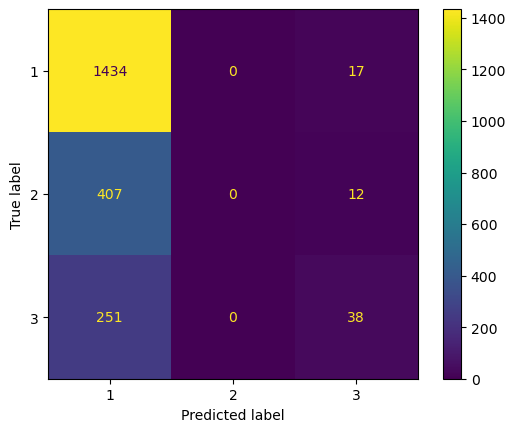

In [35]:
clf = SVC(kernel='linear')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
print('Classification reportL{}'.format(classification_report(y_test,y_pred)))

print(classification_report(y_test, y_pred, digits = 4))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

### hyperparameters tuning

In [36]:
sc_param_grid = {'kernel': ['rbf'], "C": [1, 10,100], "gamma": [1, 0.1, 0.01,0.001]}
sc_grid = GridSearchCV(estimator = SVC(), param_grid = sc_param_grid, refit = True, verbose = 3, cv = 5)
sc_grid

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [37]:
sc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.669 total time=   1.8s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.670 total time=   1.8s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.669 total time=   1.7s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.669 total time=   1.7s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.668 total time=   1.7s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.697 total time=   0.9s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.694 total time=   1.1s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.9s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.697 total time=   1.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.690 total time=   1.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.677 total time=   0.9s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [38]:
sc_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [39]:
sc_grid.best_score_

0.6931479642502483

[[1381   39   31]
 [ 359   45   15]
 [ 209   24   56]]
Accuracy Score 0.6864289022695692
Classification reportL              precision    recall  f1-score   support

           1       0.71      0.95      0.81      1451
           2       0.42      0.11      0.17       419
           3       0.55      0.19      0.29       289

    accuracy                           0.69      2159
   macro avg       0.56      0.42      0.42      2159
weighted avg       0.63      0.69      0.62      2159

              precision    recall  f1-score   support

           1     0.7086    0.9518    0.8124      1451
           2     0.4167    0.1074    0.1708       419
           3     0.5490    0.1938    0.2864       289

    accuracy                         0.6864      2159
   macro avg     0.5581    0.4176    0.4232      2159
weighted avg     0.6306    0.6864    0.6174      2159



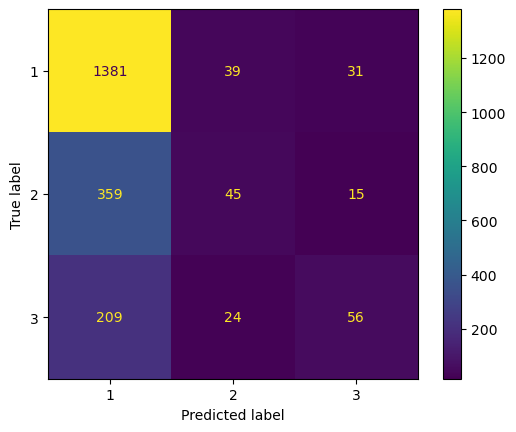

In [40]:
# fittming model with the best params
clf = SVC(kernel=sc_grid.best_params_['kernel'], C = sc_grid.best_params_["C"], gamma = sc_grid.best_params_['gamma'])
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('Accuracy Score {}'.format(accuracy_score(y_test,y_pred)))
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
print('Classification reportL{}'.format(classification_report(y_test,y_pred)))
print(classification_report(y_test, y_pred, digits = 4))

In [41]:
print(confusion_matrix(y_test,y_pred))

[[1381   39   31]
 [ 359   45   15]
 [ 209   24   56]]


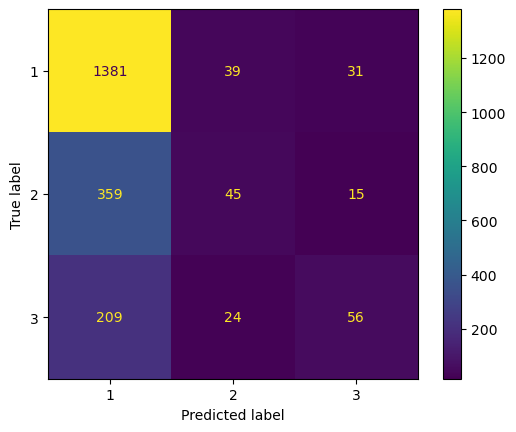

In [42]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

In [43]:
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

In [44]:
# fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)

# common_params = {
#     "X": X,
#     "y": y,
#     "train_sizes": np.linspace(0.1, 1.0, 5),
#     "cv": ShuffleSplit(n_splits=50, test_size=0.3, random_state=0),
#     "score_type": "both",
#     "n_jobs": 4,
#     "line_kw": {"marker": "o"},
#     "std_display_style": "fill_between",
#     "score_name": "Accuracy",
# }

# for ax_idx, estimator in enumerate([clf]):
#     LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
#     handles, label = ax[ax_idx].get_legend_handles_labels()
#     ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
#     ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [45]:
# from sklearn.model_selection import learning_curve

# common_params = {
#     "X": X,
#     "y": y,
#     "train_sizes": np.linspace(0.1, 1.0, 5),
#     "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
#     "n_jobs": 4,
#     "return_times": True,
# }
# train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
#     clf, **common_params
# )

In [46]:
# fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex=True)

# for ax_idx, (fit_times, score_times, estimator) in enumerate(
#     zip(
#         [fit_times_svm],
#         [score_times_svm],
#         [clf],
#     )
# ):
#     # scalability regarding the fit time
#     ax[0, ax_idx].plot(train_sizes, fit_times.mean(axis=1), "o-")
#     ax[0, ax_idx].fill_between(
#         train_sizes,
#         fit_times.mean(axis=1) - fit_times.std(axis=1),
#         fit_times.mean(axis=1) + fit_times.std(axis=1),
#         alpha=0.3,
#     )
#     ax[0, ax_idx].set_ylabel("Fit time (s)")
#     ax[0, ax_idx].set_title(
#         f"Scalability of the {estimator.__class__.__name__} classifier"
#     )

#     # scalability regarding the score time
#     ax[1, ax_idx].plot(train_sizes, score_times.mean(axis=1), "o-")
#     ax[1, ax_idx].fill_between(
#         train_sizes,
#         score_times.mean(axis=1) - score_times.std(axis=1),
#         score_times.mean(axis=1) + score_times.std(axis=1),
#         alpha=0.3,
#     )
#     ax[1, ax_idx].set_ylabel("Score time (s)")
#     ax[1, ax_idx].set_xlabel("Number of training samples")

In [47]:
# def plot_svc_decision_function(clf, ax=None, plot_support=True):
#     """Plot the decision function for a 2D SVC"""
#     if ax is None:
#         ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()
    
#     # create grid to evaluate model
#     x = np.linspace(xlim[0], xlim[1], 30)
#     y = np.linspace(ylim[0], ylim[1], 30)
#     Y, X = np.meshgrid(y, x)
#     xy = np.vstack([X.ravel(), Y.ravel()]).T
#     P = clf.decision_function(xy).reshape(X.shape)
    
#     # plot decision boundary and margins
#     ax.contour(X, Y, P, colors='k',
#                levels=[-1, 0, 1], alpha=0.5,
#                linestyles=['--', '-', '--'])
    
#     # plot support vectors
#     if plot_support:
#         ax.scatter(clf.support_vectors_[:, 0],
#                    clf.support_vectors_[:, 1],
#                    s=300, linewidth=1, facecolors='none');
#     ax.set_xlim(xlim)
#     ax.set_ylim(ylim)

In [48]:
# from sklearn.datasets import make_blobs
# from sklearn.datasets import make_circles
# # from sklearn.datasets.samples_generator import make_circles
# X, y = make_circles(100, factor=.1, noise=.1)

# clf = SVC(kernel='linear').fit(X, y)

# plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# plot_svc_decision_function(clf, plot_support=False);